In [104]:
import pandas as pd
from torchvision import transforms
import torch
import torchvision
import numpy as np
import dataset_utils

In [105]:
df = pd.read_csv('final_dataset.csv',index_col=0)
tform = transforms.Compose([transforms.Resize((256,256)),transforms.PILToTensor(),transforms.ConvertImageDtype(torch.float),transforms.Normalize(0.5,0.5)])
image_dataset = torchvision.datasets.ImageFolder("image_dataset/",transform=tform)
species2genus = dataset_utils.species_label_to_genus_label(df,image_dataset)

In [160]:
temp = torch.randn(1050)
temp = torch.nn.functional.softmax(temp)
label_best_specie = temp.argmax()
label_genus_da_controllare = species2genus[label_best_specie.item()]
species_same_genus = [k for k,v in species2genus.items() if v == label_genus_da_controllare]
reduced_species = temp[species_same_genus]
normalized_reduced_species = reduced_species/(reduced_species.sum())

def entropy_per_symbol(v):
    entropy = 0 
    for p in normalized_reduced_species:
        entropy-=p*math.log(p,2)
    mean_symbol_entropy = entropy/math.log(len(normalized_reduced_species),2)
    return mean_symbol_entropy
    

/tmp/ipykernel_5730/61449978.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  temp = torch.nn.functional.softmax(temp)


In [109]:
normalized_reduced_species

tensor([0.0248, 0.0337, 0.1920, 0.1024, 0.6396, 0.0074])

In [158]:
import math


In [159]:
print(f"total entropy: {entropy}")
print(f"mean entropy per symbol: {mean_symbol_entropy}")

total entropy: 1.5559436082839966
mean entropy per symbol: 0.6019211411476135


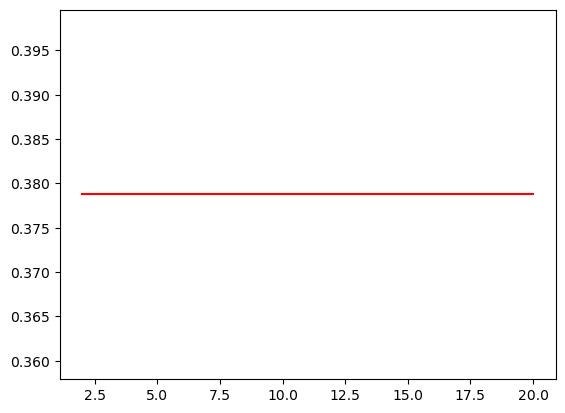

In [163]:
import matplotlib.pyplot as plt
def f(x):
    y = list()
    for xx in x:
        reduced_species = torch.tensor([1]*int(xx),dtype = torch.float16)
        #print(reduced_species)
        normalized_reduced_species = reduced_species/(reduced_species.sum())
        y.append(entropy_per_symbol(normalized_reduced_species))
    return y
x = np.linspace(2, 20,20-2+1)

plt.plot(x, f(x), color='red')

plt.show()